In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 0. EDA

In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

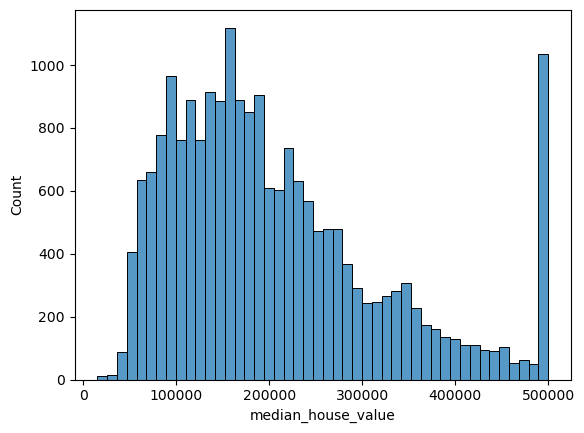

In [6]:
sns.histplot(x=df.median_house_value);

### Insight: It has the long tail

## 1. Preparing the dataset

In [7]:
# I'll go with <1H OCEAN data.
df_sub = df[df.ocean_proximity == '<1H OCEAN']

In [8]:
df_sub.drop(columns=['ocean_proximity'], inplace=True)

In [9]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9136 entries, 701 to 20506
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           9136 non-null   float64
 1   latitude            9136 non-null   float64
 2   housing_median_age  9136 non-null   float64
 3   total_rooms         9136 non-null   float64
 4   total_bedrooms      9034 non-null   float64
 5   population          9136 non-null   float64
 6   households          9136 non-null   float64
 7   median_income       9136 non-null   float64
 8   median_house_value  9136 non-null   float64
dtypes: float64(9)
memory usage: 713.8 KB


### Q01: Total_bedrooms feature has 102 missing values.

In [10]:
df_sub.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        102
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Q02. What's the median (50% percentile) for variable 'population'?: 1247

In [11]:
df_sub.population.describe()

count     9136.000000
mean      1520.290499
std       1185.848357
min          3.000000
25%        857.750000
50%       1247.000000
75%       1848.000000
max      35682.000000
Name: population, dtype: float64

In [12]:
# prepare and split the dataset
# train/val/test --> 60/20/20
n = len(df_sub)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
n_val, n_test, n_train

(1827, 1827, 5482)

In [14]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df_sub.iloc[idx[:n_train]]
df_val = df_sub.iloc[idx[n_train:n_train+n_val]]
df_test = df_sub.iloc[idx[n_train+n_val:]]

In [15]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3925,-118.56,34.18,36.0,1366.0,224.0,719.0,270.0,4.8264,251000.0
922,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,451100.0
7643,-118.27,33.82,33.0,1596.0,337.0,1650.0,329.0,4.3687,173500.0
4730,-118.36,34.05,48.0,1835.0,380.0,956.0,370.0,3.2813,243600.0
7334,-118.18,33.98,40.0,1698.0,431.0,1280.0,405.0,2.6250,206300.0


In [16]:
len(df_train)

5482

In [17]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [18]:
y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)

In [19]:
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

In [20]:
y_train

array([12.4332122 , 13.01944654, 12.06393864, ..., 12.33622772,
       12.11231676, 12.5964275 ])

In [21]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.56,34.18,36.0,1366.0,224.0,719.0,270.0,4.8264
1,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045
2,-118.27,33.82,33.0,1596.0,337.0,1650.0,329.0,4.3687
3,-118.36,34.05,48.0,1835.0,380.0,956.0,370.0,3.2813
4,-118.18,33.98,40.0,1698.0,431.0,1280.0,405.0,2.6250


In [22]:
df_train.values[:5]

array([[-1.1856e+02,  3.4180e+01,  3.6000e+01,  1.3660e+03,  2.2400e+02,
         7.1900e+02,  2.7000e+02,  4.8264e+00],
       [-1.2192e+02,  3.7530e+01,  7.0000e+00,  2.8258e+04,  3.8640e+03,
         1.2203e+04,  3.7010e+03,  8.4045e+00],
       [-1.1827e+02,  3.3820e+01,  3.3000e+01,  1.5960e+03,  3.3700e+02,
         1.6500e+03,  3.2900e+02,  4.3687e+00],
       [-1.1836e+02,  3.4050e+01,  4.8000e+01,  1.8350e+03,  3.8000e+02,
         9.5600e+02,  3.7000e+02,  3.2813e+00],
       [-1.1818e+02,  3.3980e+01,  4.0000e+01,  1.6980e+03,  4.3100e+02,
         1.2800e+03,  4.0500e+02,  2.6250e+00]])

### Q03: Missing Values with 0 and Mean

In [23]:
# features
features = list(df_sub.columns)
features = features[:-1]
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [24]:
def dot(x, w):
    n = len(x)

    res = 0.0

    for j in range(x):
        res = res + x[j]*w[j]

    return res

In [25]:
# defining the linear_regression_model
def linear_regression_model(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [26]:
# defining the Root Mean Square Error
def rmse(y, y_pred):
    error = y - y_pred
    sr = error ** 2
    mse = sr.mean()
    return round(np.sqrt(mse), 2)

#### Methods: 
 * Filling the missing values with zeros
 * Filling the missing values with mean

In [27]:
def prepare_X_zero(df):
    # df = df.copy()

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [28]:
def prepare_X_mean(df):
    df = df.copy()

    df_num = df[features]
    df_num = df_num.fillna(df['total_bedrooms'].mean())
    X = df_num.values
    return X

In [29]:
X_train = prepare_X_zero(df_train)
w0, w = linear_regression_model(X_train, y_train)

X_val = prepare_X_zero(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.29

In [30]:
X_train = prepare_X_mean(df_train)
w0, w = linear_regression_model(X_train, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.29

#### Both give the same answer.

### Q4. Train with Regularization

In [31]:
# defining the linear_regression_model with regularization
def linear_regression_model_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [32]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_zero(df_train)
    w0, w = linear_regression_model_reg(X_train, y_train, r)
    
    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 -5.832275809117563 0.29
1e-06 -5.832181744089903 0.29
0.0001 -5.822884354338061 0.29
0.001 -5.739702031521093 0.29
0.01 -5.022189632809177 0.29
0.1 -2.2307579633763748 0.29
1 -0.337261218026239 0.29
5 -0.0678737384780668 0.29
10 -0.032334207834188694 0.29


### Q5. Different Seed

In [33]:
def dif_seed(df, seed=42):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    X_train = prepare_X_zero(df_train)
    w0, w = linear_regression_model(X_train, y_train)
    
    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)

    return score


In [34]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    score = dif_seed(df_sub, seed)
    scores.append(score)
    print(seed, score)

0 0.42
1 0.42
2 0.42
3 0.42
4 0.42
5 0.42
6 0.42
7 0.42
8 0.42
9 0.42


### Q6.

In [35]:
n = len(df_sub)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [36]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_sub.iloc[idx[:n_train]]
df_val = df_sub.iloc[idx[n_train:n_train+n_val]]
df_test = df_sub.iloc[idx[n_train+n_val:]]

In [37]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])
    
X_full_train = prepare_X_zero(df_full_train)
w0, w = linear_regression_model_reg(X_full_train, y_full_train, r=0.001)
    
X_test = prepare_X_zero(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

0.43